# Build a forecast model to predict the Category wise sales of a certain store

## Import Libraries:

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import adfuller, pacf, acf, seasonal_decompose
from statsmodels.tsa.api import ARIMA, SARIMAX, ETSModel
from pmdarima.arima import auto_arima
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls', parse_dates=True, index_col='Order Date')
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2016-06-12,3,CA-2016-138688,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
2015-10-11,4,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
2015-10-11,5,US-2015-108966,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,9990,CA-2014-110422,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
2017-02-26,9991,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
2017-02-26,9992,CA-2017-121258,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932


In [9]:
df = df.sort_index()
df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,5092,CA-2017-156720,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048
2017-12-30,909,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
2017-12-30,908,CA-2017-143259,2018-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2014-01-03 to 2017-12-30
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Pro

In [12]:
df.isnull().sum()

Row ID           0
Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [13]:
df.index

DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

## Creating Seperate DataFrame's for Category wise Sales:

In [16]:
df.Category.unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

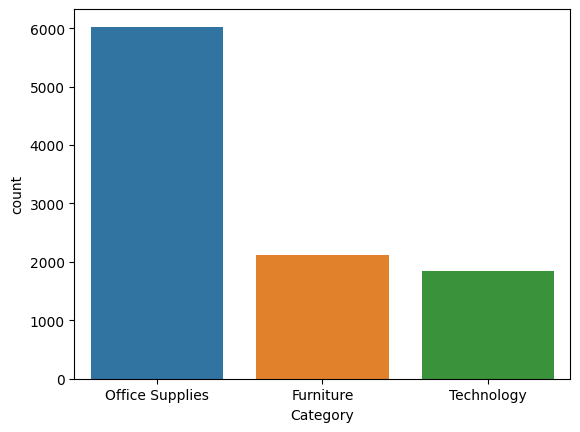

In [21]:
import seaborn as sb

sb.countplot(df['Category']);

In [19]:
office_supplies_df = df.loc[df['Category']=='Office Supplies']

In [20]:
office_supplies_df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-03,7981,CA-2014-103800,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2014-01-04,740,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2014-01-04,741,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2014-01-04,742,CA-2014-112326,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2014-01-05,1760,CA-2014-141817,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,1298,CA-2017-115427,2018-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750
2017-12-30,646,CA-2017-126221,2018-01-05,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110
2017-12-30,5092,CA-2017-156720,2018-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,Colorado,80538,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048


In [22]:
furniture_df = df.loc[df['Category']=='Furniture']
furniture_df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-06,7475,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
2014-01-07,7661,CA-2014-105417,2014-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
2014-01-10,867,CA-2014-149020,2014-01-15,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
2014-01-11,717,CA-2014-130092,2014-01-14,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2014-01-13,2979,CA-2014-109232,2014-01-16,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29,7636,US-2017-158526,2018-01-01,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,Kentucky,40214,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842
2017-12-29,5458,CA-2017-130631,2018-01-02,Standard Class,BS-11755,Bruce Stewart,Consumer,United States,Edmonds,Washington,98026,West,FUR-FU-10004093,Furniture,Furnishings,Hand-Finished Solid Wood Document Frame,68.460,2,0.0,20.5380
2017-12-29,1878,CA-2017-118885,2018-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,California,90049,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,0.2,-44.2764


In [23]:
technology_df = df.loc[df['Category']=='Technology']
technology_df

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,,
2014-01-06,7478,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,TEC-PH-10004977,Technology,Phones,GE 30524EE4,391.980,2,0.0,113.6742
2014-01-06,7479,CA-2014-167199,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,TEC-PH-10004539,Technology,Phones,Wireless Extenders zBoost YX545 SOHO Signal Bo...,755.960,4,0.0,204.1092
2014-01-09,594,CA-2014-135405,2014-01-13,Standard Class,MS-17830,Melanie Seite,Consumer,United States,Laredo,Texas,78041,Central,TEC-AC-10001266,Technology,Accessories,Memorex Micro Travel Drive 8 GB,31.200,3,0.2,9.7500
2014-01-13,766,CA-2014-162775,2014-01-15,Second Class,CS-12250,Chris Selesnick,Corporate,United States,Bossier City,Louisiana,71111,South,TEC-AC-10003174,Technology,Accessories,Plantronics S12 Corded Telephone Headset System,646.740,6,0.0,258.6960
2014-01-15,1914,CA-2014-103366,2014-01-17,First Class,EH-13990,Erica Hackney,Consumer,United States,Roswell,Georgia,30076,South,TEC-AC-10003628,Technology,Accessories,Logitech 910-002974 M325 Wireless Mouse for We...,149.950,5,0.0,65.9780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,8958,CA-2017-105620,2017-12-28,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Hialeah,Florida,33012,South,TEC-MA-10004626,Technology,Machines,Lexmark 20R1285 X6650 Wireless All-in-One Printer,120.000,2,0.5,-7.2000
2017-12-27,2570,CA-2017-134404,2017-12-27,Same Day,DR-12880,Dan Reichenbach,Corporate,United States,Newark,Ohio,43055,East,TEC-PH-10000576,Technology,Phones,AT&T 1080 Corded phone,164.388,2,0.4,-35.6174
2017-12-28,574,CA-2017-164826,2018-01-04,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024,East,TEC-PH-10000347,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,14.850,3,0.0,4.0095


In [24]:
os_data = office_supplies_df['Sales']
f_data = furniture_df['Sales']
t_data = technology_df['Sales']

## USER DEFINED FUNCTIONS:

In [31]:
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if(pvalue>0.05):
        print('p-value =', pvalue, 'Data is not Stationary')   
    else:
        print('p-value =', pvalue, 'Data is Stationary')

In [58]:
def shift_trail(data):
    for i in range(1,3):
        print('shifting of', i)
        shift_data = data-data.shift(i)
        shift_data.dropna(inplace=True)
        print(checkStationarity(shift_data))

In [56]:
def shift(data):
    shift_data = data-data.shift()
    shift_data.dropna(inplace=True)

In [43]:
def plot(data):
    lag_acf = acf(data, nlags=20)
    lag_pacf = pacf(data, nlags=20, method='ols')

    # plot PACF (p)
    plt.subplot(121)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color="gray")
    plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color="gray")
    plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color="gray")
    plt.title("Partial AutoCorrelation")

    # plot ACF (q)
    plt.subplot(122)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color="gray")
    plt.axhline(y=-1.96/np.sqrt(len(data)),linestyle='--',color="gray")
    plt.axhline(y=1.96/np.sqrt(len(data)),linestyle='--',color="gray")
    plt.title("AutoCorrelation")

    plt.tight_layout()

In [44]:
def corelogram_plot(data):
    fig = plt.figure(figsize=(8, 10))

    # Show ACF
    ax1 = fig.add_subplot(211)
    sm.graphics.tsa.plot_pacf(data, lags=20, ax=ax1)

    # Show PACF
    ax2 = fig.add_subplot(212)
    sm.graphics.tsa.plot_acf(data, lags=20, ax=ax2)

    plt.tight_layout()

In [126]:
def arma_trail(data,a,b,c,d):
    for i in range(a,b):
        for j in range(c,d):
            m_a = ARIMA(data,order=(i,0,j))
            r_a = m_a.fit()
            print('p = ',i ,'and d = ',0, 'and q = ',j)
            print(r_a.aic)

In [73]:
def arma(data,p,q):
    m_a = ARIMA(data,order=(p,0,q))
    r_a = m_a.fit()
    print(r_a.summary())
    print('\n')
    
    pvalue = sm.stats.acorr_ljungbox(r_a.resid,lags=[1],return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print("Reject H0. Bad model")
    else:
        print("Accept H0. Good model")

In [171]:
def predict_arma(data,p,q,train,test):
    m_a = ARIMA(data,order=(p,0,q))
    r_a = m_a.fit()
    
    pred_arma = r_a.predict(len(train),len(train)+len(test)-1)
    print(pred_arma)
    print('\n')
    
    actual = []; pred = []
    for i in range(len(pred_arma)):
        actual.append(test[i])
        pred.append(pred_arma[i])

    df_arma = pd.DataFrame({'actual':actual, 'predicted':pred}, index=test.index)
    df_arma['error'] = df_arma.actual - df_arma.predicted
    
    model_arma = 'arma Model'
    mse_arma = mean_squared_error(df_arma.actual, df_arma.predicted)
    rmse_arma = np.sqrt(mse_arma)
    print(model_arma)
    print('MSE = ',mse_arma)
    print('RMSE = ',rmse_arma)
    
    return df_arma

In [50]:
def arima_trail(data,a,b,c,d,e):
    for i in range(a,b):
        for j in range(c,d):
            for k in range(e,e+1):
                m = ARIMA(data,order=(i,k,j))
                r = m.fit()
                print('p = ',i ,'and d = ',k, 'and q = ',j)
                print(r.aic)

In [74]:
def arima(data, p,d,q):
    m = ARIMA(data,order=(p,d,q))
    r = m.fit()
    print(r.summary())
    print('\n')
    pvalue = sm.stats.acorr_ljungbox(r.resid,lags=[1],return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print("Reject H0. Bad model")
    else:
        print("Accept H0. Good model")

In [84]:
def predict_arima(data,p,d,q,train,test):
    m = ARIMA(data,order=(p,d,q))
    r = m.fit()
    
    pred_arima = r.predict(len(train),len(train)+len(test)-1)
    print(pred_arima)
    print('\n')
    
    actual = []; pred = []
    for i in range(len(pred_arima)):
        actual.append(test[i])
        pred.append(pred_arima[i])

    df_arima = pd.DataFrame({'actual':actual, 'predicted':pred}, index=test.index)
    df_arima['error'] = df_arima.actual - df_arima.predicted
    
    model_arima = 'ARIMA Model'
    mse_arima = mean_squared_error(df_arima.actual, df_arima.predicted)
    rmse_arima = np.sqrt(mse_arima)
    print(model_arima)
    print('MSE = ',mse_arima)
    print('RMSE = ',rmse_arima)
    
    return df_arima

In [78]:
def sarima_trail(data,a,b,c,d,p,q,e,m):
    for P in range(a,b):
        for Q in range(c,d):
            ms = SARIMAX(data,order=(p,e,q), seasonal_order=(P,e,Q,m))
            rs = ms.fit()
            print('P = ',P ,'and D = ',e, 'and Q = ',Q)
            print(rs.aic)

In [75]:
def sarima(data,p,q,e,P,Q,m):
    ms = SARIMAX(data,order=(p,e,q), seasonal_order=(P,e,Q,m))
    rs = ms.fit()
    print(rs.summary())
    print('\n')
    pvalue = sm.stats.acorr_ljungbox(rs.resid,lags=[1],return_df=True)['lb_pvalue'].values
    if pvalue < 0.05:
        print("Reject H0. Bad model")
    else:
        print("Accept H0. Good model")

In [88]:
def predict_sarima(data,p,q,e,P,Q,m,train,test):
    ms = SARIMAX(data,order=(p,e,q), seasonal_order=(P,e,Q,m))
    rs = ms.fit()
    
    pred_sarima = rs.predict(len(train),len(train)+len(test)-1)
    print(pred_sarima)
    print('\n')
    
    actual = []; pred = []
    for i in range(len(pred_sarima)):
        actual.append(test[i])
        pred.append(pred_sarima[i])

    df_sarima = pd.DataFrame({'actual':actual, 'predicted':pred}, index=test.index)
    df_sarima['error'] = df_sarima.actual - df_sarima.predicted
    
    model_sarima = 'Ssarima Model'
    mse_sarima = mean_squared_error(df_sarima.actual, df_sarima.predicted)
    rmse_sarima = np.sqrt(mse_sarima)
    print(model_sarima)
    print('MSE = ',mse_sarima)
    print('RMSE = ',rmse_sarima)
    
    return df_sarima

## MODEL CREATION OF CATEGORY WISE:

## OFFICE SUPPLIES CATEGORY:

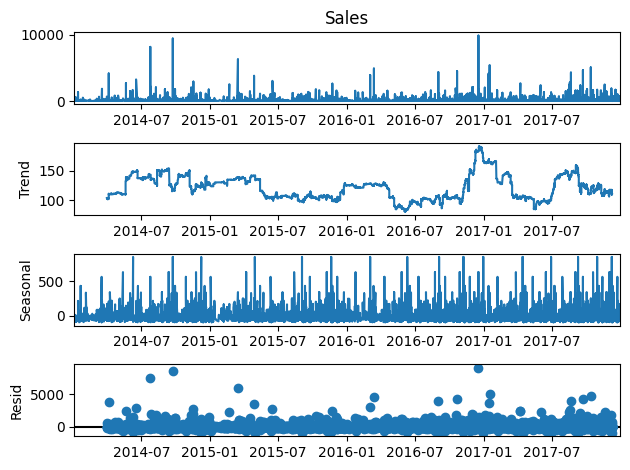

In [27]:
seasonal_decompose(os_data, period = 365).plot();

In [39]:
resample_os = os_data.resample('M').sum()
resample_os

Order Date
2014-01-31     4851.080
2014-02-28     1071.724
2014-03-31     8605.879
2014-04-30    11155.074
2014-05-31     7135.624
2014-06-30    12953.037
2014-07-31    15121.208
2014-08-31    11379.462
2014-09-30    27423.298
2014-10-31     7211.128
2014-11-30    26862.436
2014-12-31    18006.462
2015-01-31     1808.780
2015-02-28     5368.067
2015-03-31    15882.547
2015-04-30    12558.558
2015-05-31     9113.736
2015-06-30    10647.747
2015-07-31     4719.939
2015-08-31    11735.108
2015-09-30    19305.767
2015-10-31     8673.410
2015-11-30    21218.130
2015-12-31    16201.674
2016-01-31     5299.682
2016-02-29     6794.350
2016-03-31    17346.931
2016-04-30    10647.447
2016-05-31    13035.202
2016-06-30    10901.810
2016-07-31    12924.444
2016-08-31     8959.740
2016-09-30    23263.738
2016-10-31    16281.794
2016-11-30    20487.278
2016-12-31    37997.566
2017-01-31    21274.289
2017-02-28     7407.772
2017-03-31    14550.286
2017-04-30    15072.191
2017-05-31    13736.964
2017-

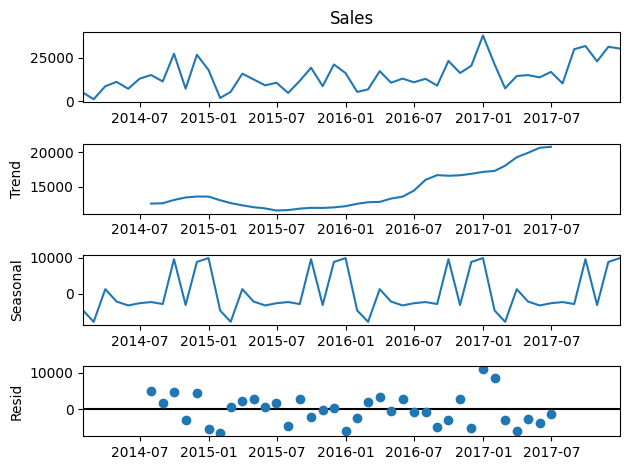

In [40]:
seasonal_decompose(resample_os).plot();

In [42]:
checkStationarity(os_data)

p-value = 0.0 Data is Stationary


In [41]:
checkStationarity(resample_os)

p-value = 0.32948727549472767 Data is not Stationary


In [59]:
shift_trail(resample_os)

shifting of 1
p-value = 0.0004287262459097774 Data is Stationary
None
shifting of 2
p-value = 4.759796173483665e-05 Data is Stationary
None


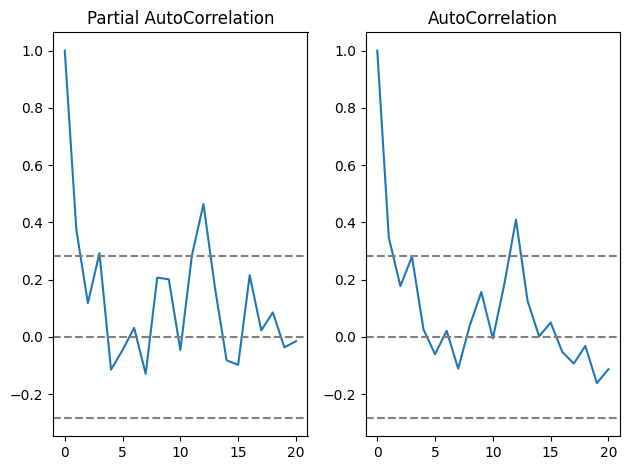

In [45]:
plot(resample_os)

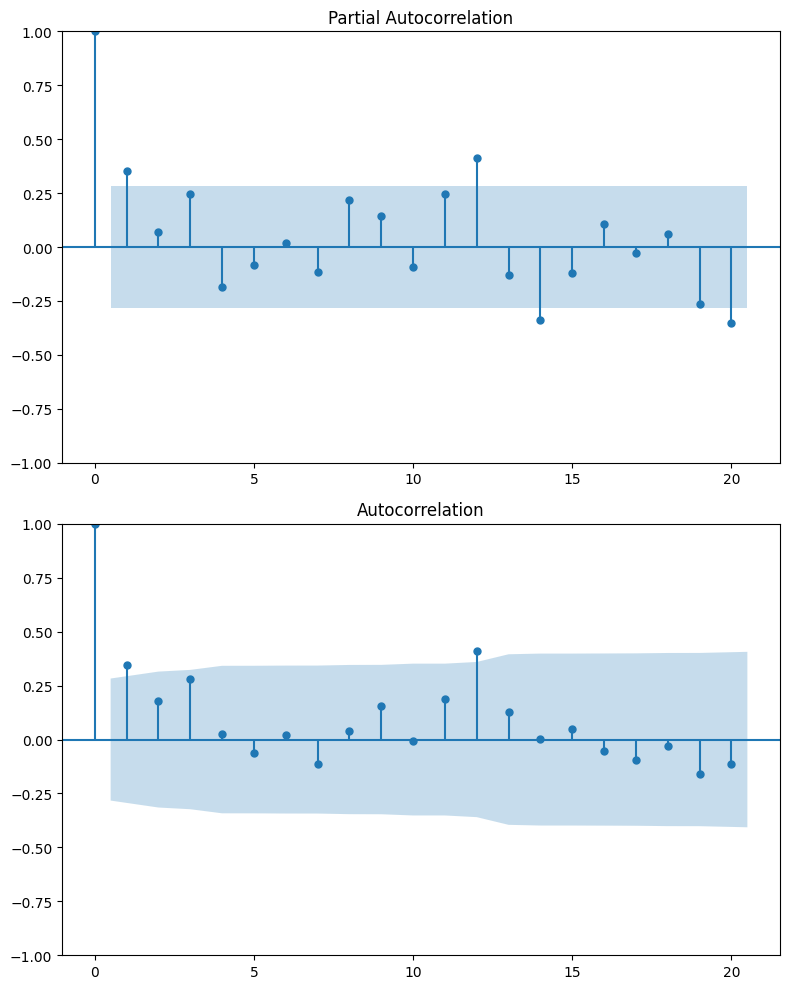

In [46]:
corelogram_plot(resample_os)

## ARIMA MODEL:

In [66]:
arima_trail(resample_os,1,3,1,3,1)

p =  1 and d =  1 and q =  1
983.2136811668869
p =  1 and d =  1 and q =  2
984.1498720799776
p =  2 and d =  1 and q =  1
983.5684043858836
p =  2 and d =  1 and q =  2
985.3184599480072


### Best ARIMA Model is p = 1, d = 1, q = 1 because the AIC Score is lesser compared to other models.

In [76]:
arima(resample_os,1,1,1)

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -488.607
Date:                Tue, 31 Jan 2023   AIC                            983.214
Time:                        17:25:36   BIC                            988.764
Sample:                    01-31-2014   HQIC                           985.302
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1076      0.241      0.446      0.656      -0.365       0.580
ma.L1         -0.7615      0.132     -5.767      0.000      -1.020      -0.503
sigma2      7.146e+07   1.48e-10   4.84e+17      0.0

In [82]:
train = resample_os.iloc[:34]
test = resample_os.iloc[34:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 34, test = 14


In [87]:
predict_arima(resample_os,1,1,1,train,test)

Order Date
2016-11-30    14944.278313
2016-12-31    16718.661820
2017-01-31    23677.276402
2017-02-28    21304.843655
2017-03-31    16498.696297
2017-04-30    16802.554081
2017-05-31    16446.054869
2017-06-30    15656.328510
2017-07-31    16297.416598
2017-08-31    14135.470205
2017-09-30    20065.489676
2017-10-31    23084.322421
2017-11-30    22119.919997
2017-12-31    25257.866092
Freq: M, Name: predicted_mean, dtype: float64


ARIMA Model
MSE =  88759747.1437806
RMSE =  9421.239151182854


,actual,predicted,error
Order Date,,,
2016-11-30,20487.278,14944.278313,5542.999687
2016-12-31,37997.566,16718.661820,21278.904180
2017-01-31,21274.289,23677.276402,-2402.987402
2017-02-28,7407.772,21304.843655,-13897.071655
2017-03-31,14550.286,16498.696297,-1948.410297
2017-04-30,15072.191,16802.554081,-1730.363081
2017-05-31,13736.964,16446.054869,-2709.090869
2017-06-30,16912.039,15656.328510,1255.710490
2017-07-31,10241.468,16297.416598,-6055.948598


## SARIMA MODEL:

In [79]:
sarima_trail(resample_os,1,3,0,3,1,1,1,12)

P =  1 and D =  1 and Q =  0
723.2480909691152
P =  1 and D =  1 and Q =  1
719.6946202690868
P =  1 and D =  1 and Q =  2
721.7152359966828
P =  2 and D =  1 and Q =  0
719.6732580138529
P =  2 and D =  1 and Q =  1
726.1503368229996
P =  2 and D =  1 and Q =  2
728.1505760688119


### Best SARIMA Model is P = 2, D = 1, Q = 0 because the AIC Score is lesser compared to other models.

In [80]:
sarima(resample_os,1,1,1,2,0,12)

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood                -354.837
Date:                             Tue, 31 Jan 2023   AIC                            719.673
Time:                                     17:30:03   BIC                            727.450
Sample:                                 01-31-2014   HQIC                           722.358
                                      - 12-31-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3226      0.214      1.510      0.131      -0.096       0.741
ma.L1         -0.9960      

In [89]:
predict_sarima(resample_os,1,1,1,2,0,12,train,test)

Order Date
2016-11-30    26792.138309
2016-12-31    18103.429792
2017-01-31    17107.437785
2017-02-28    16148.697434
2017-03-31    20667.558238
2017-04-30    16535.433983
2017-05-31    15870.819957
2017-06-30    17305.563855
2017-07-31    16433.672083
2017-08-31    15389.317963
2017-09-30    33845.499735
2017-10-31    18770.718259
2017-11-30    31484.461904
2017-12-31    31695.245391
Freq: M, Name: predicted_mean, dtype: float64


Ssarima Model
MSE =  60765717.32436431
RMSE =  7795.2368356814095


,actual,predicted,error
Order Date,,,
2016-11-30,20487.278,26792.138309,-6304.860309
2016-12-31,37997.566,18103.429792,19894.136208
2017-01-31,21274.289,17107.437785,4166.851215
2017-02-28,7407.772,16148.697434,-8740.925434
2017-03-31,14550.286,20667.558238,-6117.272238
2017-04-30,15072.191,16535.433983,-1463.242983
2017-05-31,13736.964,15870.819957,-2133.855957
2017-06-30,16912.039,17305.563855,-393.524855
2017-07-31,10241.468,16433.672083,-6192.204083


### FORECAST FOR OFFICE SUPPLIES:
Since the error is Less in SARIMA, Lets Plot the Forecast for SARIMA MODEL.

In [97]:
ms = SARIMAX(resample_os,order=(1,1,1), seasonal_order=(2,1,0,12))
rs = ms.fit()

pred_sarima = rs.get_prediction(len(train),len(train)+len(test)-1)
print(pred_sarima.predicted_mean)
print('\n')
    
actual = []; pred = []
for i in range(len(pred_sarima.predicted_mean)):
    actual.append(test[i])
    pred.append(pred_sarima.predicted_mean[i])

df_sarima = pd.DataFrame({'actual':actual, 'predicted':pred}, index=test.index)
df_sarima['error'] = df_sarima.actual - df_sarima.predicted
    
model_sarima = 'Sarima Model'
mse_sarima = mean_squared_error(df_sarima.actual, df_sarima.predicted)
rmse_sarima = np.sqrt(mse_sarima)
print(model_sarima)
print('MSE = ',mse_sarima)
print('RMSE = ',rmse_sarima)

Order Date
2016-11-30    26792.138309
2016-12-31    18103.429792
2017-01-31    17107.437785
2017-02-28    16148.697434
2017-03-31    20667.558238
2017-04-30    16535.433983
2017-05-31    15870.819957
2017-06-30    17305.563855
2017-07-31    16433.672083
2017-08-31    15389.317963
2017-09-30    33845.499735
2017-10-31    18770.718259
2017-11-30    31484.461904
2017-12-31    31695.245391
Freq: M, Name: predicted_mean, dtype: float64


Sarima Model
MSE =  60765717.32436431
RMSE =  7795.2368356814095


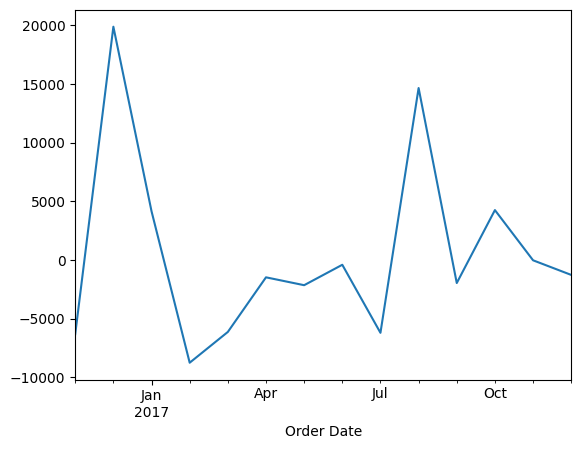

In [98]:
df_sarima.error.plot();

fc_sarima = rs.get_forecast(36)

fc = fc_sarima.predicted_mean
fc

d = resample_os.append(fc)
d

sarima_fc = d[47:]
sarima_fc

resample_os.plot(figsize=(15,7),legend=True)
sarima_fc.plot(label='Forecast');
plt.legend()
plt.title('BEST MODEL')
plt.show()

In [105]:
fc_sarima = rs.get_forecast(36)

fc = fc_sarima.predicted_mean
fc

2018-01-31    16875.215343
2018-02-28    14127.834568
2018-03-31    23633.834428
2018-04-30    20073.332533
2018-05-31    19862.642372
2018-06-30    20314.507033
2018-07-31    17634.586509
2018-08-31    23921.392667
2018-09-30    32613.997710
2018-10-31    24147.117328
2018-11-30    31726.559318
2018-12-31    37851.990526
2019-01-31    23550.588737
2019-02-28    16960.397174
2019-03-31    25684.751650
2019-04-30    23151.111232
2019-05-31    23078.571281
2019-06-30    24096.097110
2019-07-31    20809.203774
2019-08-31    30536.801650
2019-09-30    37587.133071
2019-10-31    29309.143654
2019-11-30    36444.305531
2019-12-31    42196.094524
2020-01-31    27630.755129
2020-02-29    20957.766535
2020-03-31    29640.559378
2020-04-30    27398.870887
2020-05-31    26959.173467
2020-06-30    28252.712063
2020-07-31    24410.173936
2020-08-31    35080.177119
2020-09-30    41584.044385
2020-10-31    33082.274591
2020-11-30    40727.809967
2020-12-31    44995.236639
Freq: M, Name: predicted_mea

In [106]:
d = resample_os.append(fc)
d

2014-01-31     4851.080000
2014-02-28     1071.724000
2014-03-31     8605.879000
2014-04-30    11155.074000
2014-05-31     7135.624000
                  ...     
2020-08-31    35080.177119
2020-09-30    41584.044385
2020-10-31    33082.274591
2020-11-30    40727.809967
2020-12-31    44995.236639
Freq: M, Length: 84, dtype: float64

In [107]:
sarima_fc = d[47:]
sarima_fc

2017-12-31    30436.942000
2018-01-31    16875.215343
2018-02-28    14127.834568
2018-03-31    23633.834428
2018-04-30    20073.332533
2018-05-31    19862.642372
2018-06-30    20314.507033
2018-07-31    17634.586509
2018-08-31    23921.392667
2018-09-30    32613.997710
2018-10-31    24147.117328
2018-11-30    31726.559318
2018-12-31    37851.990526
2019-01-31    23550.588737
2019-02-28    16960.397174
2019-03-31    25684.751650
2019-04-30    23151.111232
2019-05-31    23078.571281
2019-06-30    24096.097110
2019-07-31    20809.203774
2019-08-31    30536.801650
2019-09-30    37587.133071
2019-10-31    29309.143654
2019-11-30    36444.305531
2019-12-31    42196.094524
2020-01-31    27630.755129
2020-02-29    20957.766535
2020-03-31    29640.559378
2020-04-30    27398.870887
2020-05-31    26959.173467
2020-06-30    28252.712063
2020-07-31    24410.173936
2020-08-31    35080.177119
2020-09-30    41584.044385
2020-10-31    33082.274591
2020-11-30    40727.809967
2020-12-31    44995.236639
F

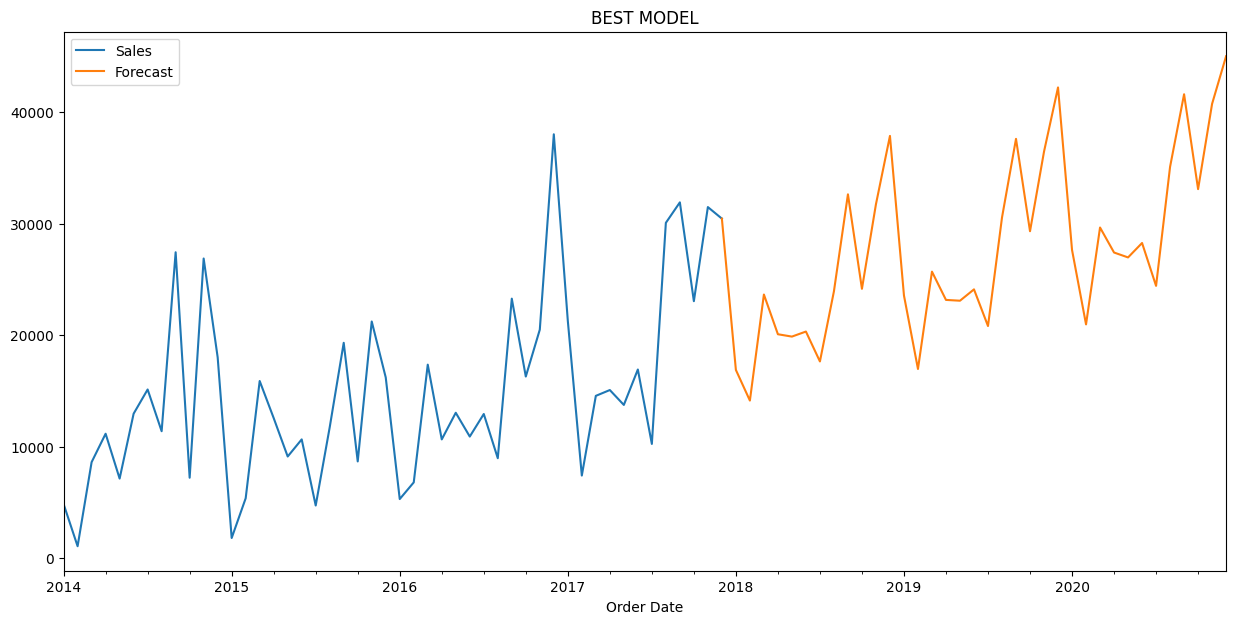

In [108]:
resample_os.plot(figsize=(15,7),legend=True)
sarima_fc.plot(label='Forecast');
plt.legend()
plt.title('BEST MODEL')
plt.show()

In [111]:
office_supplies = pd.DataFrame({'Sales':d,'Date':d.index})
office_supplies

,Sales,Date
2014-01-31,4851.080000,2014-01-31
2014-02-28,1071.724000,2014-02-28
2014-03-31,8605.879000,2014-03-31
2014-04-30,11155.074000,2014-04-30
2014-05-31,7135.624000,2014-05-31
...,...,...
2020-08-31,35080.177119,2020-08-31
2020-09-30,41584.044385,2020-09-30
2020-10-31,33082.274591,2020-10-31
2020-11-30,40727.809967,2020-11-30


In [114]:
office_supplies.to_excel('Category1.xlsx')

## FURNITURE CATEGORY:

In [118]:
f_data

Order Date
2014-01-06    2573.820
2014-01-07      76.728
2014-01-10      51.940
2014-01-11       9.940
2014-01-13     545.940
                ...   
2017-12-29     300.980
2017-12-29      68.460
2017-12-29     393.568
2017-12-29     101.120
2017-12-30     323.136
Name: Sales, Length: 2121, dtype: float64

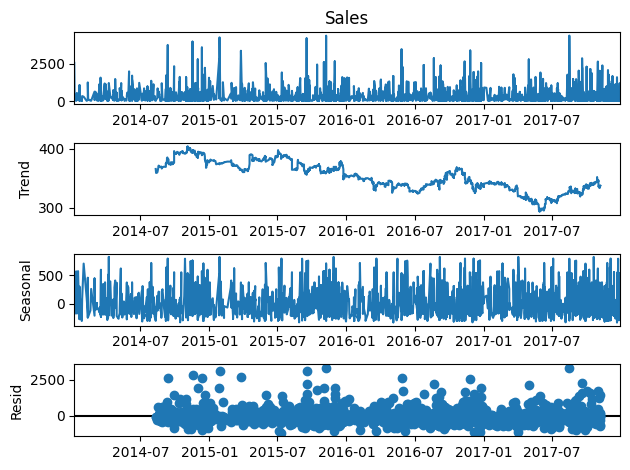

In [119]:
seasonal_decompose(f_data,period = 365).plot();

In [120]:
resample_f = f_data.resample('M').sum()
resample_f

Order Date
2014-01-31     6242.5250
2014-02-28     1839.6580
2014-03-31    14573.9560
2014-04-30     7944.8370
2014-05-31     6912.7870
2014-06-30    13206.1256
2014-07-31    10821.0510
2014-08-31     7320.3465
2014-09-30    23816.4808
2014-10-31    12304.2470
2014-11-30    21564.8727
2014-12-31    30645.9665
2015-01-31    11739.9416
2015-02-28     3134.3740
2015-03-31    12499.7830
2015-04-30    10475.6985
2015-05-31     9374.9505
2015-06-30     7714.1790
2015-07-31    13674.4200
2015-08-31     9638.5922
2015-09-30    26273.0230
2015-10-31    12026.6235
2015-11-30    30880.8325
2015-12-31    23085.8192
2016-01-31     7622.7430
2016-02-29     3925.5510
2016-03-31    12801.0920
2016-04-30    13212.0900
2016-05-31    15119.8350
2016-06-30    13070.5720
2016-07-31    13068.5190
2016-08-31    12483.2323
2016-09-30    27262.8809
2016-10-31    11872.5770
2016-11-30    31783.6288
2016-12-31    36678.7150
2017-01-31     5964.0320
2017-02-28     6866.3374
2017-03-31    10893.4448
2017-04-30    

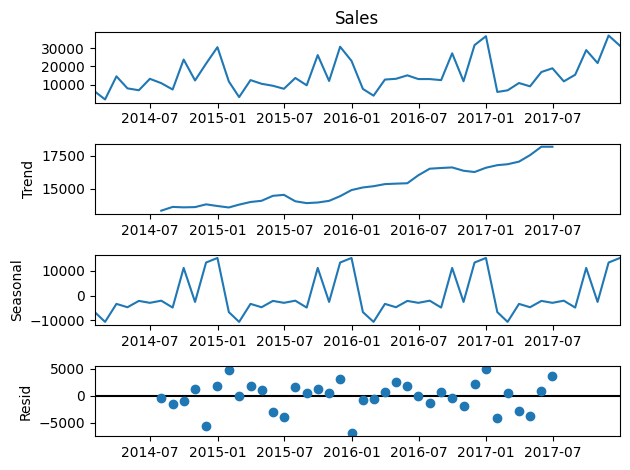

In [121]:
seasonal_decompose(resample_f).plot();

In [122]:
checkStationarity(resample_f)

p-value = 8.450793985809671e-05 Data is Stationary


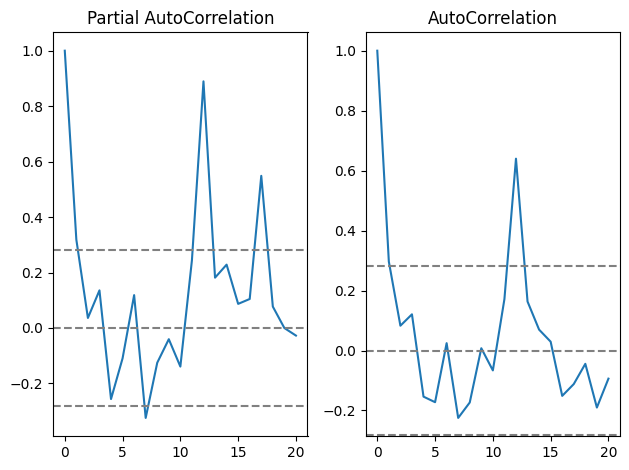

In [123]:
plot(resample_f)

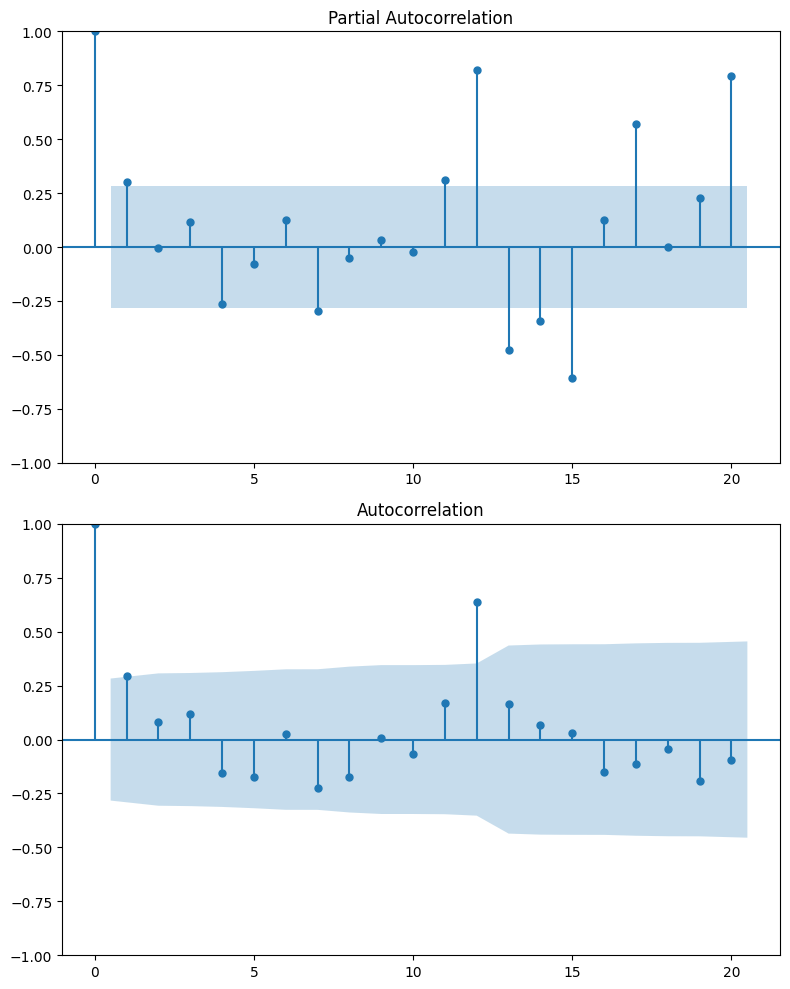

In [124]:
corelogram_plot(resample_f)

In [127]:
arma_trail(resample_f,1,6,1,3)

p =  1 and d =  0 and q =  1
1013.5506459586784
p =  1 and d =  0 and q =  2
1015.6621595844638
p =  2 and d =  0 and q =  1
1015.5414607996662
p =  2 and d =  0 and q =  2
1017.3078988385078
p =  3 and d =  0 and q =  1
1016.2575040063203
p =  3 and d =  0 and q =  2
1009.7663295232983
p =  4 and d =  0 and q =  1
1015.690641247114
p =  4 and d =  0 and q =  2
1010.6089862353092
p =  5 and d =  0 and q =  1
1014.4096608869147
p =  5 and d =  0 and q =  2
1010.990022700155


### Best ARMA Model is p = 3, d = 0, q = 2 because the AIC Score is lesser compared to other models.

In [129]:
arma(resample_f,3,2)

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -497.883
Date:                Tue, 31 Jan 2023   AIC                           1009.766
Time:                        20:50:23   BIC                           1022.865
Sample:                    01-31-2014   HQIC                          1014.716
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.546e+04   3611.637      4.280      0.000    8379.651    2.25e+04
ar.L1         -0.5511      0.242     -2.280      0.023      -1.025      -0.077
ar.L2         -0.4876      0.241     -2.020      0.0

In [282]:
arma(resample_f,9,2)

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(9, 0, 2)   Log Likelihood                -498.412
Date:                Tue, 31 Jan 2023   AIC                           1022.824
Time:                        22:48:23   BIC                           1047.150
Sample:                    01-31-2014   HQIC                          1032.017
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.546e+04   1557.982      9.922      0.000    1.24e+04    1.85e+04
ar.L1          0.1835     37.396      0.005      0.996     -73.111      73.478
ar.L2          0.0615     16.720      0.004      0.9

In [213]:
train = resample_f.iloc[:38]
test = resample_f.iloc[38:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 38, test = 10


In [214]:
predict_arma(resample_f,3,2,train,test)

Order Date
2017-03-31    14817.027950
2017-04-30     6529.910582
2017-05-31    15849.694079
2017-06-30    19014.035938
2017-07-31    10693.020719
2017-08-31    17577.692838
2017-09-30    17902.491860
2017-10-31    15285.297801
2017-11-30    22382.410131
2017-12-31    27913.769324
Freq: M, Name: predicted_mean, dtype: float64


arma Model
MSE =  42373599.069572374
RMSE =  6509.5006774385065


,actual,predicted,error
Order Date,,,
2017-03-31,10893.4448,14817.027950,-3923.583150
2017-04-30,9065.9581,6529.910582,2536.047518
2017-05-31,16957.5582,15849.694079,1107.864121
2017-06-30,19008.5867,19014.035938,-5.449238
2017-07-31,11813.0220,10693.020719,1120.001281
2017-08-31,15441.8740,17577.692838,-2135.818838
2017-09-30,29028.2060,17902.491860,11125.714140
2017-10-31,21884.0682,15285.297801,6598.770399
2017-11-30,37056.7150,22382.410131,14674.304869


### FORECAST FOR FURNITURE:

In [215]:
m_a = ARIMA(resample_f,order=(9,0,2))
r_a = m_a.fit()
    
pred_arma = r_a.predict(len(train),len(train)+len(test)-1)
print(pred_arma)
print('\n')
    
actual = []; pred = []
for i in range(len(pred_arma)):
    actual.append(test[i])
    pred.append(pred_arma[i])

df_arma = pd.DataFrame({'actual':actual, 'predicted':pred}, index=test.index)
df_arma['error'] = df_arma.actual - df_arma.predicted
    
model_arma = 'arma Model'
mse_arma = mean_squared_error(df_arma.actual, df_arma.predicted)
rmse_arma = np.sqrt(mse_arma)
print(model_arma)
print('MSE = ',mse_arma)
print('RMSE = ',rmse_arma)

Order Date
2017-03-31    14196.276632
2017-04-30     3025.512330
2017-05-31    14241.056954
2017-06-30    18044.244941
2017-07-31     9088.743867
2017-08-31    15284.262648
2017-09-30    18942.526320
2017-10-31    19485.596567
2017-11-30    19712.680154
2017-12-31    23567.996153
Freq: M, Name: predicted_mean, dtype: float64


arma Model
MSE =  53289799.546577334
RMSE =  7299.986270300605


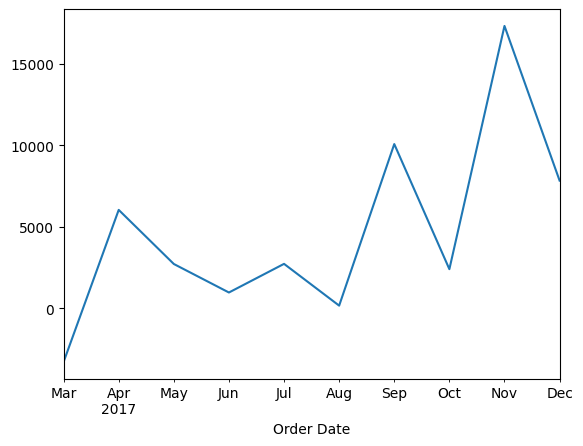

In [216]:
df_arma.error.plot();

In [220]:
fc_arma = r_a.get_forecast(24)

fc = fc_arma.predicted_mean
fc

2018-01-31    14581.938924
2018-02-28    12547.720049
2018-03-31    11733.147885
2018-04-30     4360.856980
2018-05-31     9604.390239
2018-06-30    10002.553466
2018-07-31     7452.215719
2018-08-31    13834.669571
2018-09-30    18198.014583
2018-10-31    17827.343670
2018-11-30    21496.443301
2018-12-31    21173.952161
2019-01-31    17891.170429
2019-02-28    18110.505758
2019-03-31    16561.556001
2019-04-30    13402.789100
2019-05-31    13421.674567
2019-06-30    12792.648033
2019-07-31    11935.464802
2019-08-31    13654.283297
2019-09-30    14735.814377
2019-10-31    15088.579490
2019-11-30    16642.098353
2019-12-31    17168.055092
Freq: M, Name: predicted_mean, dtype: float64

In [221]:
d = resample_f.append(fc)
d

2014-01-31     6242.525000
2014-02-28     1839.658000
2014-03-31    14573.956000
2014-04-30     7944.837000
2014-05-31     6912.787000
                  ...     
2019-08-31    13654.283297
2019-09-30    14735.814377
2019-10-31    15088.579490
2019-11-30    16642.098353
2019-12-31    17168.055092
Freq: M, Length: 72, dtype: float64

In [222]:
arma_fc = d[47:]
arma_fc

2017-12-31    31407.466800
2018-01-31    14581.938924
2018-02-28    12547.720049
2018-03-31    11733.147885
2018-04-30     4360.856980
2018-05-31     9604.390239
2018-06-30    10002.553466
2018-07-31     7452.215719
2018-08-31    13834.669571
2018-09-30    18198.014583
2018-10-31    17827.343670
2018-11-30    21496.443301
2018-12-31    21173.952161
2019-01-31    17891.170429
2019-02-28    18110.505758
2019-03-31    16561.556001
2019-04-30    13402.789100
2019-05-31    13421.674567
2019-06-30    12792.648033
2019-07-31    11935.464802
2019-08-31    13654.283297
2019-09-30    14735.814377
2019-10-31    15088.579490
2019-11-30    16642.098353
2019-12-31    17168.055092
Freq: M, dtype: float64

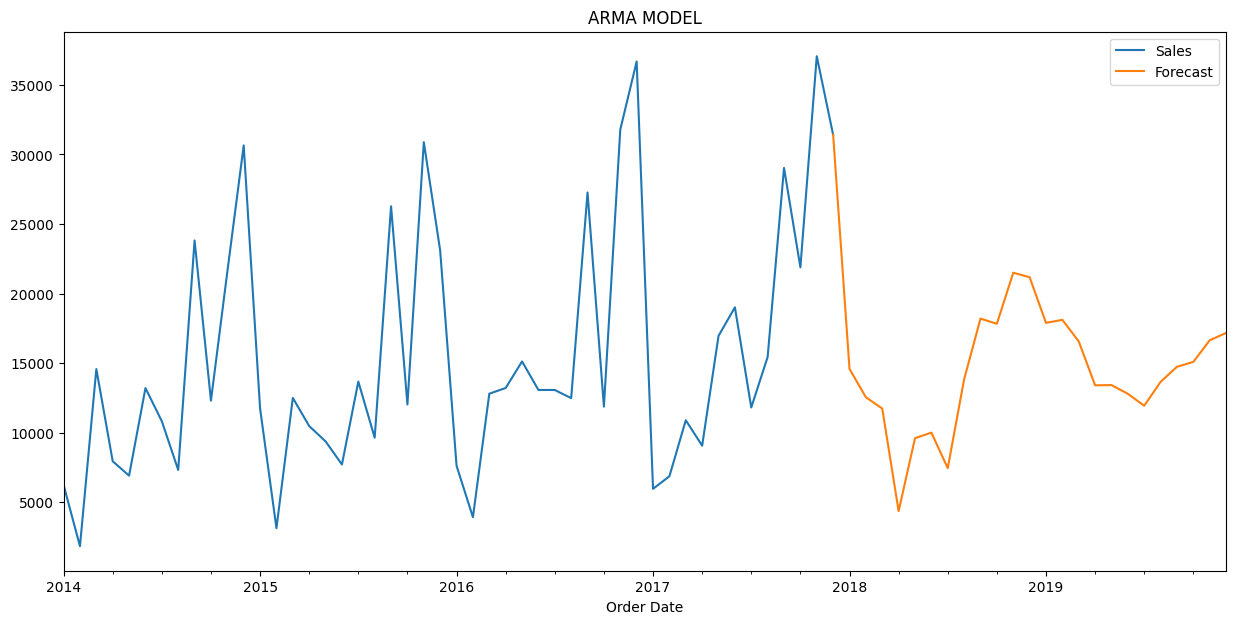

In [223]:
resample_f.plot(figsize=(15,7),legend=True)
arma_fc.plot(label='Forecast');
plt.legend()
plt.title('ARMA MODEL')
plt.show()

In [367]:
from statsmodels.tsa.api import ExponentialSmoothing

model = ExponentialSmoothing(resample_f,trend='mul',seasonal='add',seasonal_periods=12).fit()
exp = model.fittedvalues

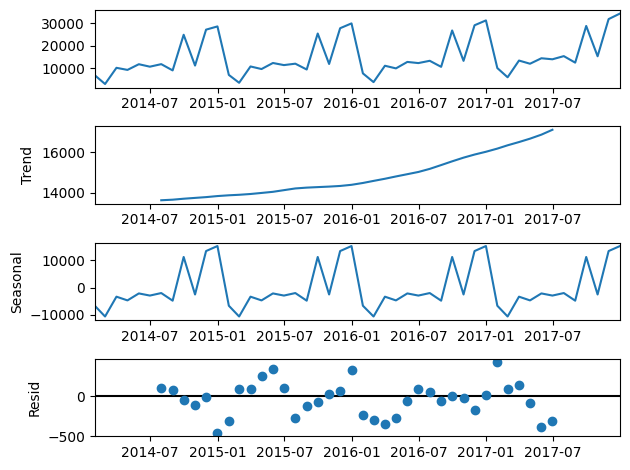

In [368]:
seasonal_decompose(exp).plot();

In [369]:
checkStationarity(exp)

p-value = 0.00010267866482287731 Data is Stationary


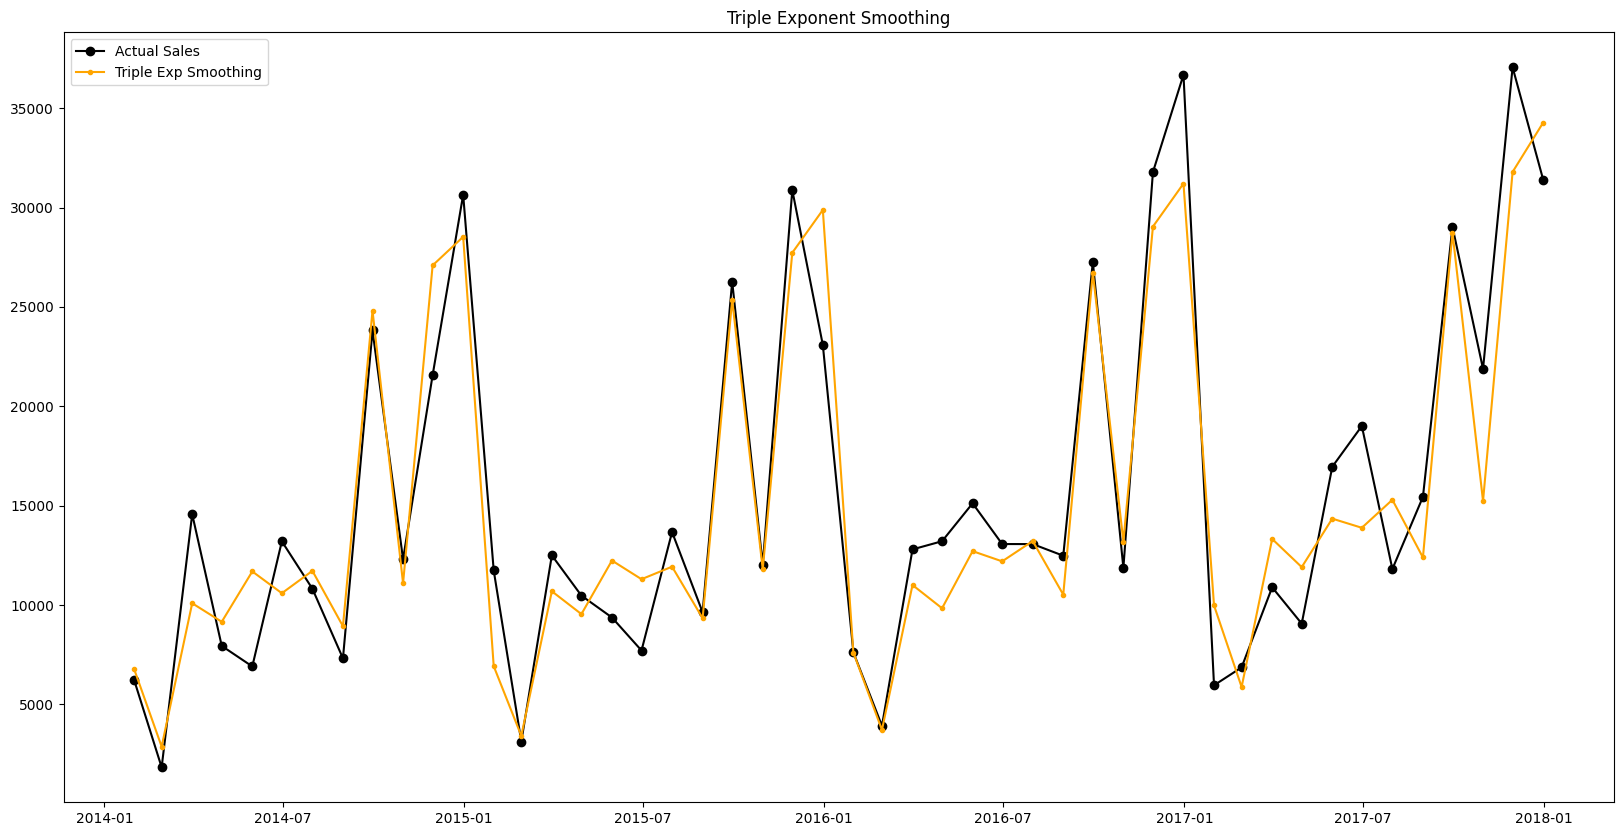

In [370]:
plt.figure(figsize = (20,10))
plt.plot(resample_f, marker='o',color='black',label='Actual Sales')
plt.plot(exp,marker='.',color='orange',label='Triple Exp Smoothing')
plt.title('Triple Exponent Smoothing')
plt.legend()
plt.show()

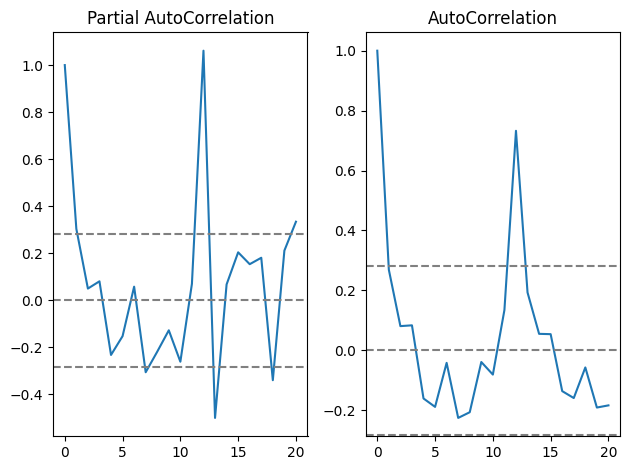

In [371]:
plot(exp)

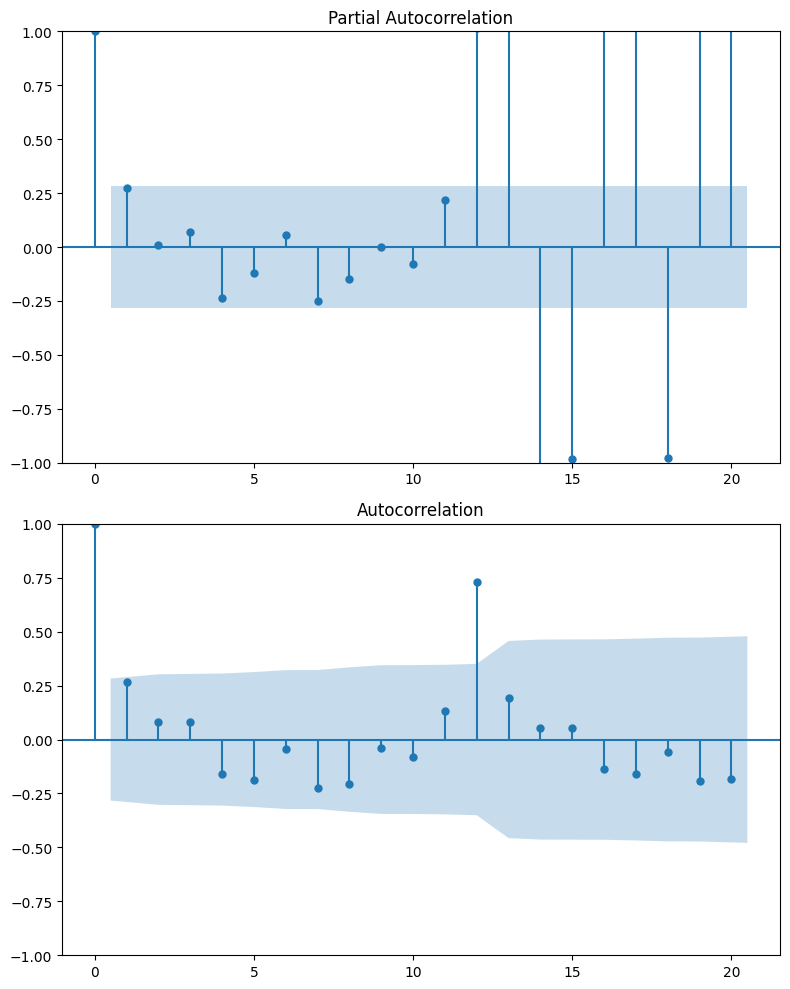

In [372]:
corelogram_plot(exp)

In [373]:
arma_trail(exp,1,10,1,2)

p =  1 and d =  0 and q =  1
1008.210131658421
p =  2 and d =  0 and q =  1
1010.2048399590608
p =  3 and d =  0 and q =  1
1011.6697280510573
p =  4 and d =  0 and q =  1
1010.2672000700306
p =  5 and d =  0 and q =  1
1008.6196295878992
p =  6 and d =  0 and q =  1
1010.6900267158322
p =  7 and d =  0 and q =  1
1012.0258760424563
p =  8 and d =  0 and q =  1
1013.518207256784
p =  9 and d =  0 and q =  1
1015.125660170841


In [374]:
arma(exp,1,1)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -500.105
Date:                Wed, 01 Feb 2023   AIC                           1008.210
Time:                        00:44:45   BIC                           1015.695
Sample:                    01-31-2014   HQIC                          1011.039
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.503e+04   2150.963      6.989      0.000    1.08e+04    1.92e+04
ar.L1          0.4486      0.512      0.876      0.381      -0.555       1.452
ma.L1         -0.1565      0.523     -0.299      0.7

In [375]:
train = exp.iloc[:38]
test = exp.iloc[38:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 38, test = 10


In [380]:
m_a = ARIMA(exp,order=(2,0,1))
r_a = m_a.fit()
    
pred_arma = r_a.predict(len(train),len(train)+len(test)-1)
print(pred_arma)
print('\n')
    
actual = []; pred = []
for i in range(len(pred_arma)):
    actual.append(test[i])
    pred.append(pred_arma[i])

df_arma = pd.DataFrame({'actual':actual, 'predicted':pred}, index=test.index)
df_arma['error'] = df_arma.actual - df_arma.predicted
    
model_arma = 'arma Model'
mse_arma = mean_squared_error(df_arma.actual, df_arma.predicted)
rmse_arma = np.sqrt(mse_arma)
print(model_arma)
print('MSE = ',mse_arma)
print('RMSE = ',rmse_arma)

Order Date
2017-03-31    12236.510655
2017-04-30    14070.530173
2017-05-31    13977.759285
2017-06-30    14661.556587
2017-07-31    14643.395421
2017-08-31    15046.837375
2017-09-30    14269.028279
2017-10-31    18895.576092
2017-11-30    15744.453133
2017-12-31    20012.541845
Freq: M, Name: predicted_mean, dtype: float64


arma Model
MSE =  69744005.04973766
RMSE =  8351.287628248572


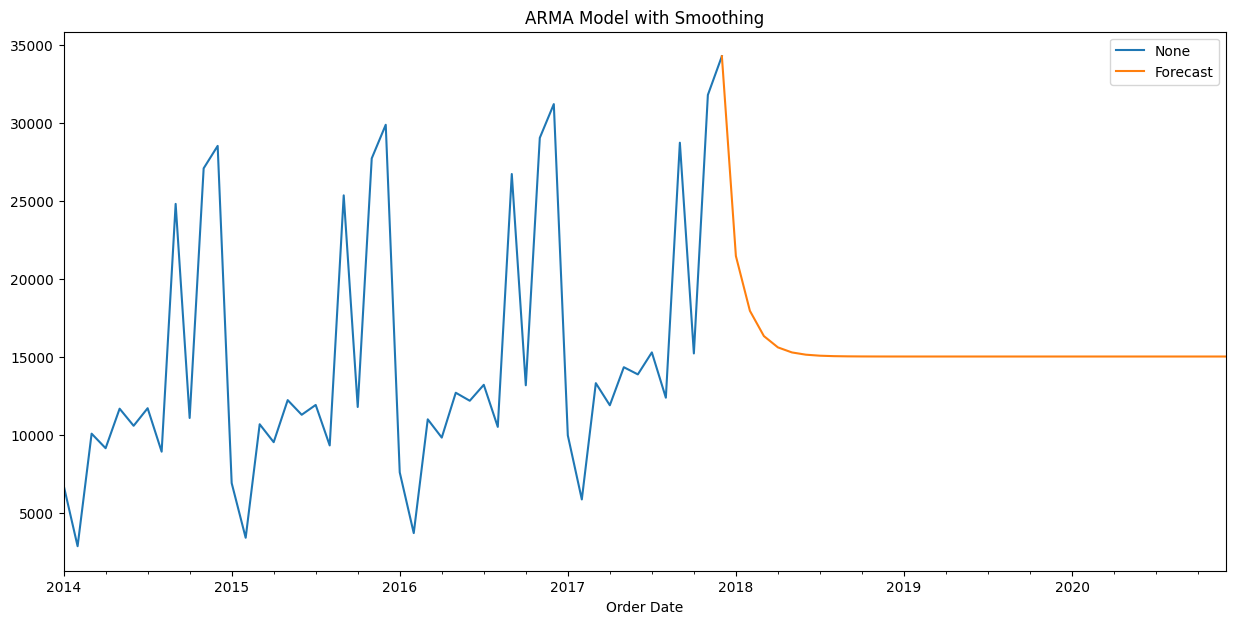

In [382]:
fc_arma = r_a.get_forecast(36)

fc = fc_arma.predicted_mean
fc

d = exp.append(fc)
d

arma_fc = d[47:]
arma_fc

exp.plot(figsize=(15,7),legend=True)
arma_fc.plot(label='Forecast');
plt.legend()
plt.title('ARMA Model with Smoothing')
plt.show()

In [224]:
furniture = pd.DataFrame({'Sales':d,'Date':d.index})
furniture

,Sales,Date
2014-01-31,6242.525000,2014-01-31
2014-02-28,1839.658000,2014-02-28
2014-03-31,14573.956000,2014-03-31
2014-04-30,7944.837000,2014-04-30
2014-05-31,6912.787000,2014-05-31
...,...,...
2019-08-31,13654.283297,2019-08-31
2019-09-30,14735.814377,2019-09-30
2019-10-31,15088.579490,2019-10-31
2019-11-30,16642.098353,2019-11-30


In [225]:
furniture.to_excel('Category2.xlsx')

## TECHNOLOGY CATEGORY TYPE:

In [156]:
t_data

Order Date
2014-01-06    391.980
2014-01-06    755.960
2014-01-09     31.200
2014-01-13    646.740
2014-01-15    149.950
               ...   
2017-12-25    120.000
2017-12-27    164.388
2017-12-28     14.850
2017-12-29    302.376
2017-12-30     90.930
Name: Sales, Length: 1847, dtype: float64

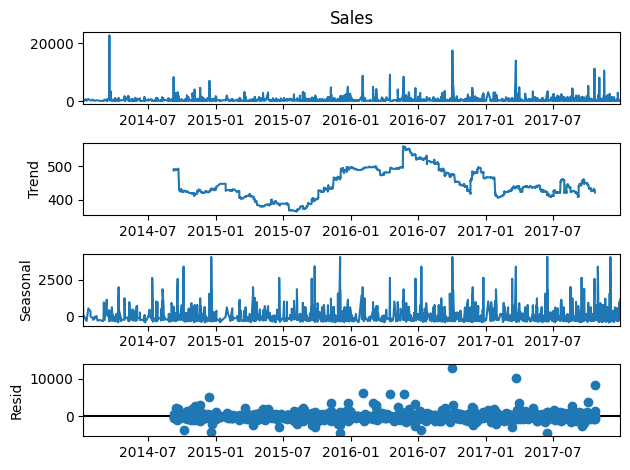

In [158]:
seasonal_decompose(t_data,period=365).plot();

In [159]:
resample_t = t_data.resample('M').sum()
resample_t

Order Date
2014-01-31     3143.290
2014-02-28     1608.510
2014-03-31    32511.174
2014-04-30     9195.434
2014-05-31     9599.876
2014-06-30     8435.965
2014-07-31     8004.134
2014-08-31     9209.660
2014-09-30    30537.572
2014-10-31    11938.018
2014-11-30    30201.408
2014-12-31    20893.192
2015-01-31     4625.354
2015-02-28     3448.970
2015-03-31    10343.922
2015-04-30    11160.952
2015-05-31    11643.000
2015-06-30     6435.366
2015-07-31    10370.966
2015-08-31    15524.632
2015-09-30    19017.128
2015-10-31    10704.890
2015-11-30    23873.601
2015-12-31    35632.028
2016-01-31     5620.066
2016-02-29    12258.914
2016-03-31    21567.852
2016-04-30    14890.502
2016-05-31    28832.691
2016-06-30    16372.152
2016-07-31    13269.000
2016-08-31     9672.402
2016-09-30    22883.406
2016-10-31    31533.374
2016-11-30    27141.059
2016-12-31    22322.762
2017-01-31    16733.053
2017-02-28     6027.024
2017-03-31    33428.622
2017-04-30    12383.387
2017-05-31    13566.588
2017-

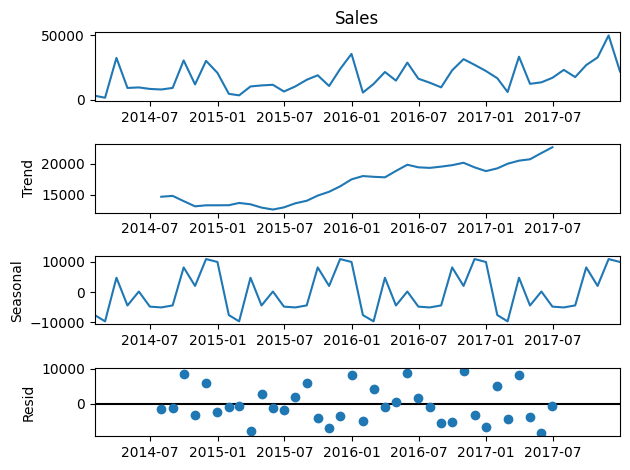

In [160]:
seasonal_decompose(resample_t).plot();

In [161]:
checkStationarity(resample_t)

p-value = 1.861596730206398e-06 Data is Stationary


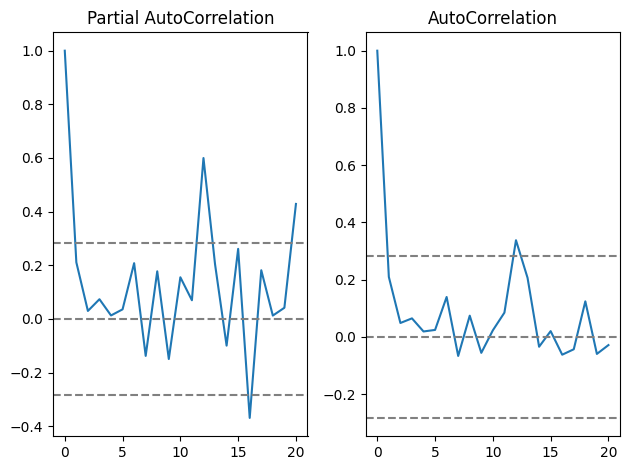

In [162]:
plot(resample_t)

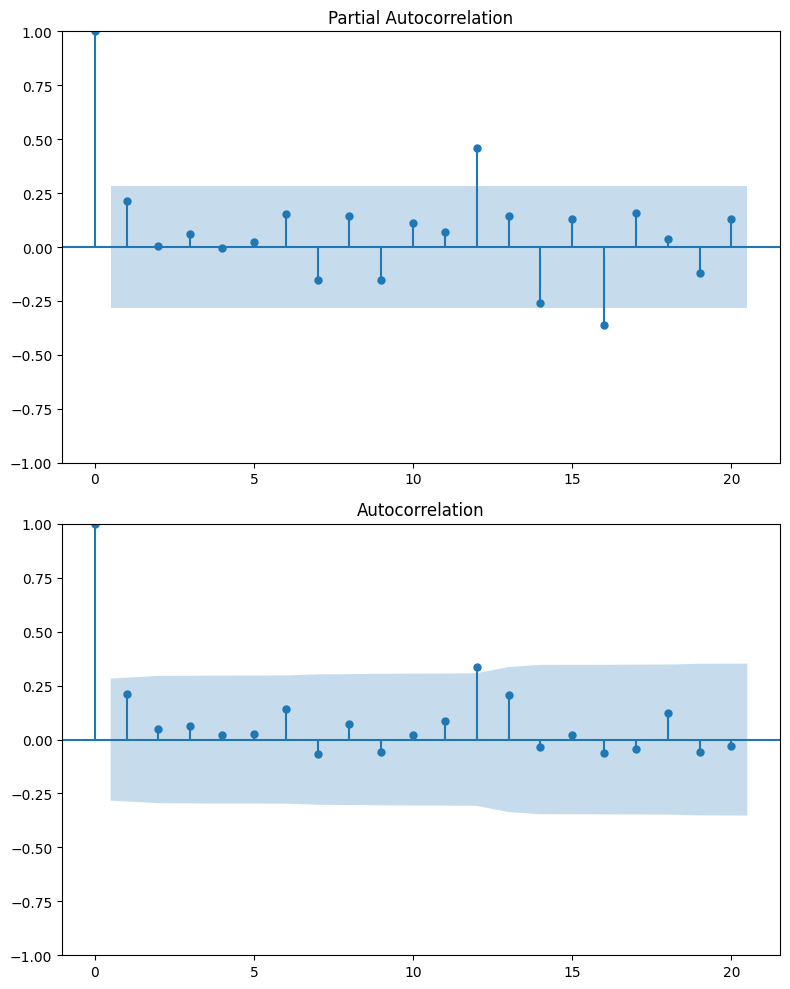

In [163]:
corelogram_plot(resample_t)

In [165]:
arma_trail(resample_t,1,3,1,2)

p =  1 and d =  0 and q =  1
1029.1161385819776
p =  2 and d =  0 and q =  1
1030.653308352468


### Best ARMA Model is p = 1, d = 0, q = 1 because the AIC Score is lesser compared to other models.

In [166]:
arma(resample_t,1,1)

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -510.558
Date:                Tue, 31 Jan 2023   AIC                           1029.116
Time:                        21:22:33   BIC                           1036.601
Sample:                    01-31-2014   HQIC                          1031.945
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.742e+04   4341.028      4.013      0.000    8911.622    2.59e+04
ar.L1          0.9454      0.162      5.845      0.000       0.628       1.262
ma.L1         -0.8366      0.230     -3.637      0.0

In [318]:
train = resample_t.iloc[:38]
test = resample_t.iloc[38:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 38, test = 10


In [251]:
m_a = ARIMA(resample_t,order=(2,0,1))
r_a = m_a.fit()
    
pred_arma = r_a.predict(len(train),len(train)+len(test)-1)
print(pred_arma)
print('\n')
    
actual = []; pred = []
for i in range(len(pred_arma)):
    actual.append(test[i])
    pred.append(pred_arma[i])

df_arma = pd.DataFrame({'actual':actual, 'predicted':pred}, index=test.index)
df_arma['error'] = df_arma.actual - df_arma.predicted
    
model_arma = 'arma Model'
mse_arma = mean_squared_error(df_arma.actual, df_arma.predicted)
rmse_arma = np.sqrt(mse_arma)
print(model_arma)
print('MSE = ',mse_arma)
print('RMSE = ',rmse_arma)

Order Date
2017-03-31    16258.959918
2017-04-30    20643.506092
2017-05-31    17560.174866
2017-06-30    17360.492436
2017-07-31    17715.706578
2017-08-31    18804.759879
2017-09-30    18041.401141
2017-10-31    19730.243884
2017-11-30    21310.165553
2017-12-31    25258.110949
Freq: M, Name: predicted_mean, dtype: float64


arma Model
MSE =  149133161.07108152
RMSE =  12212.008887610651


In [252]:
df_arma

,actual,predicted,error
Order Date,,,
2017-03-31,33428.622,16258.959918,17169.662082
2017-04-30,12383.387,20643.506092,-8260.119092
2017-05-31,13566.588,17560.174866,-3993.586866
2017-06-30,17061.100,17360.492436,-299.392436
2017-07-31,23209.926,17715.706578,5494.219422
2017-08-31,17619.162,18804.759879,-1185.597879
2017-09-30,26942.603,18041.401141,8901.201859
2017-10-31,32855.663,19730.243884,13125.419116
2017-11-30,49918.773,21310.165553,28608.607447


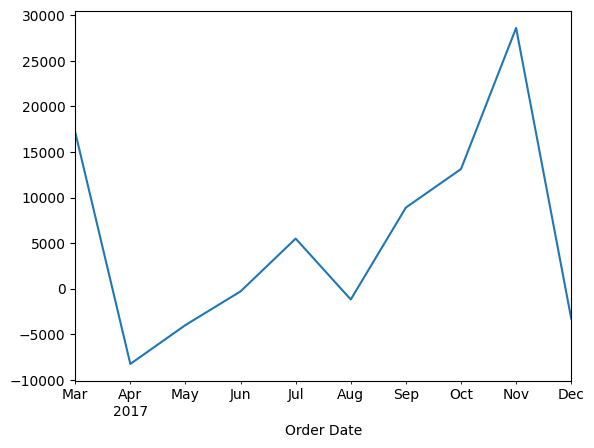

In [253]:
df_arma.error.plot();

In [254]:
fc_arma = r_a.get_forecast(24)

fc = fc_arma.predicted_mean
fc

2018-01-31    21612.914823
2018-02-28    21372.931194
2018-03-31    21158.608857
2018-04-30    20957.268991
2018-05-31    20766.926943
2018-06-30    20586.844588
2018-07-31    20416.453261
2018-08-31    20255.229662
2018-09-30    20102.680329
2018-10-31    19958.338540
2018-11-30    19821.762704
2018-12-31    19692.534995
2019-01-31    19570.260063
2019-02-28    19454.563832
2019-03-31    19345.092352
2019-04-30    19241.510714
2019-05-31    19143.502031
2019-06-30    19050.766463
2019-07-31    18963.020303
2019-08-31    18879.995109
2019-09-30    18801.436880
2019-10-31    18727.105283
2019-11-30    18656.772915
2019-12-31    18590.224605
Freq: M, Name: predicted_mean, dtype: float64

In [255]:
d = resample_t.append(fc)
d

2014-01-31     3143.290000
2014-02-28     1608.510000
2014-03-31    32511.174000
2014-04-30     9195.434000
2014-05-31     9599.876000
                  ...     
2019-08-31    18879.995109
2019-09-30    18801.436880
2019-10-31    18727.105283
2019-11-30    18656.772915
2019-12-31    18590.224605
Freq: M, Length: 72, dtype: float64

In [256]:
arma_fc = d[47:]
arma_fc

2017-12-31    21984.910000
2018-01-31    21612.914823
2018-02-28    21372.931194
2018-03-31    21158.608857
2018-04-30    20957.268991
2018-05-31    20766.926943
2018-06-30    20586.844588
2018-07-31    20416.453261
2018-08-31    20255.229662
2018-09-30    20102.680329
2018-10-31    19958.338540
2018-11-30    19821.762704
2018-12-31    19692.534995
2019-01-31    19570.260063
2019-02-28    19454.563832
2019-03-31    19345.092352
2019-04-30    19241.510714
2019-05-31    19143.502031
2019-06-30    19050.766463
2019-07-31    18963.020303
2019-08-31    18879.995109
2019-09-30    18801.436880
2019-10-31    18727.105283
2019-11-30    18656.772915
2019-12-31    18590.224605
Freq: M, dtype: float64

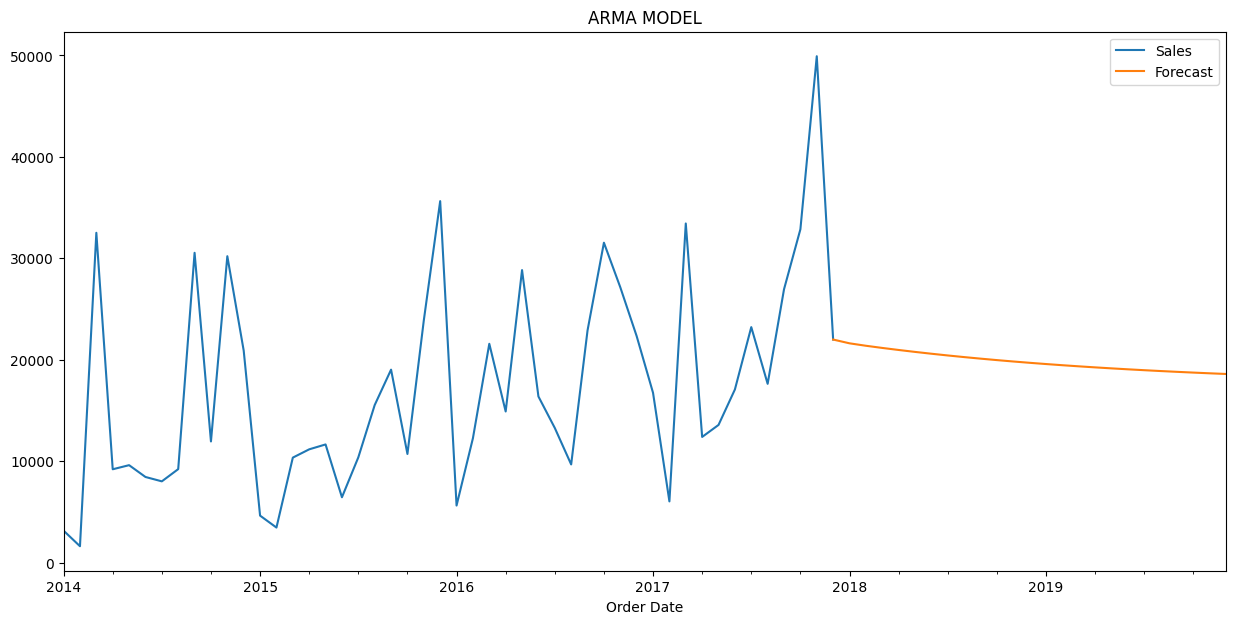

In [278]:
resample_t.plot(figsize=(15,7),legend=True)
arma_fc.plot(label='Forecast');
plt.legend()
plt.title('ARMA MODEL')
plt.show()

In [328]:
from statsmodels.tsa.api import ExponentialSmoothing

model3 = ExponentialSmoothing(resample_t,trend='mul',seasonal='add',seasonal_periods=12).fit(smoothing_level=0.3, smoothing_trend=0.3, smoothing_seasonal=0.4)
exp3 = model3.fittedvalues

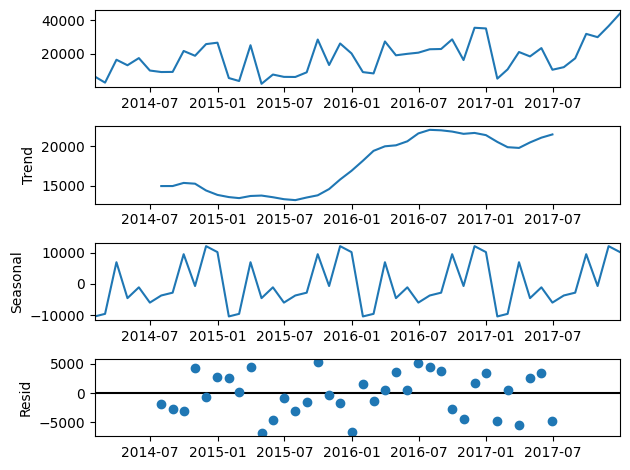

In [355]:
seasonal_decompose(exp3).plot();

In [329]:
checkStationarity(exp3)

p-value = 0.0012767583236993772 Data is Stationary


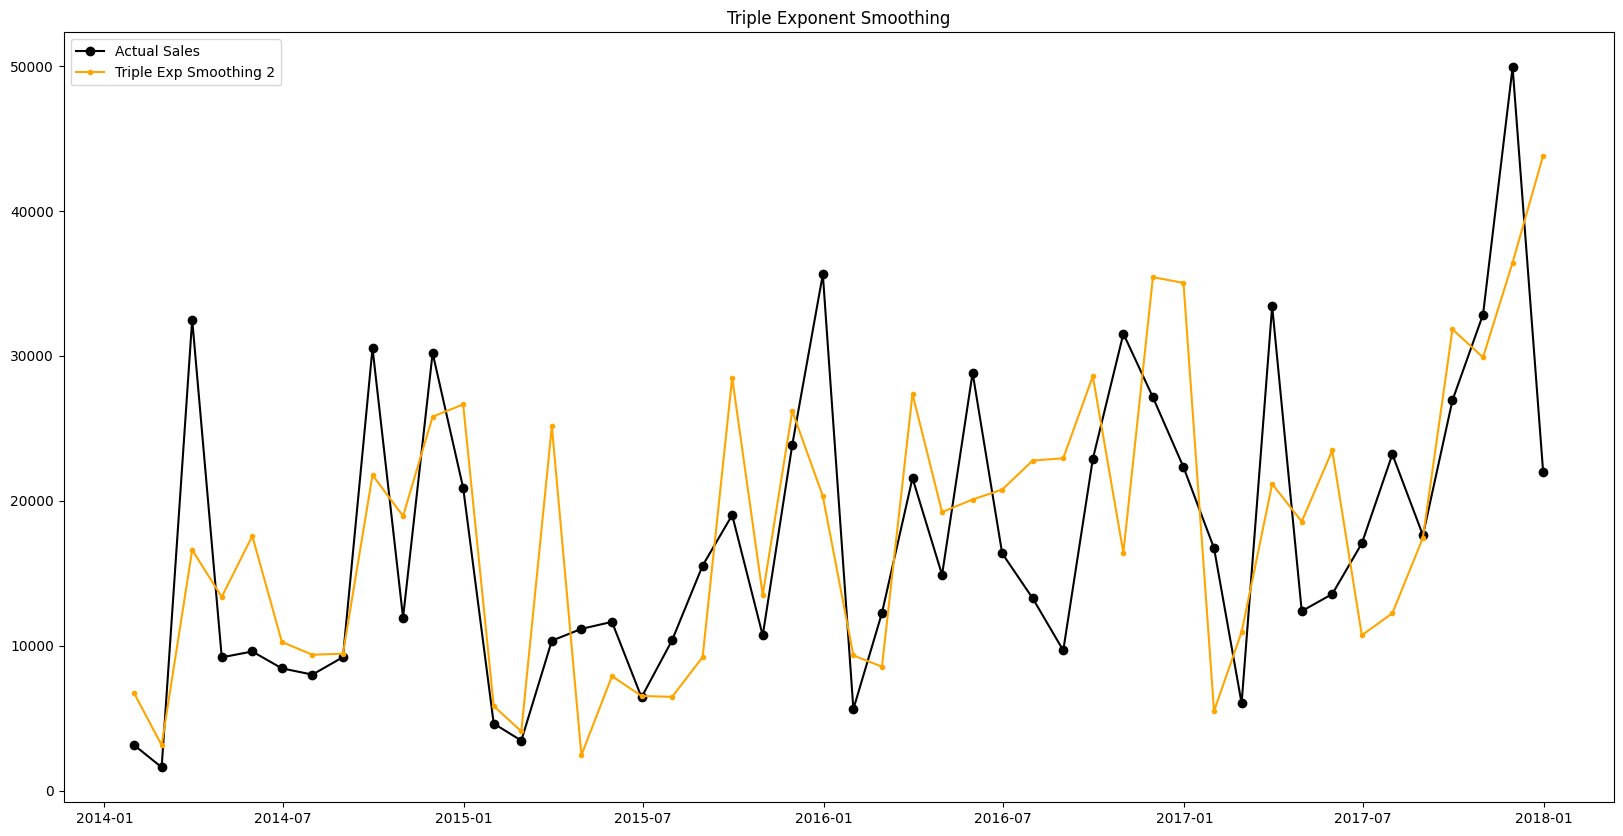

In [356]:
plt.figure(figsize = (20,10))
plt.plot(resample_t, marker='o',color='black',label='Actual Sales')
plt.plot(exp3,marker='.',color='orange',label='Triple Exp Smoothing 2')
plt.title('Triple Exponent Smoothing')
plt.legend()
plt.show()

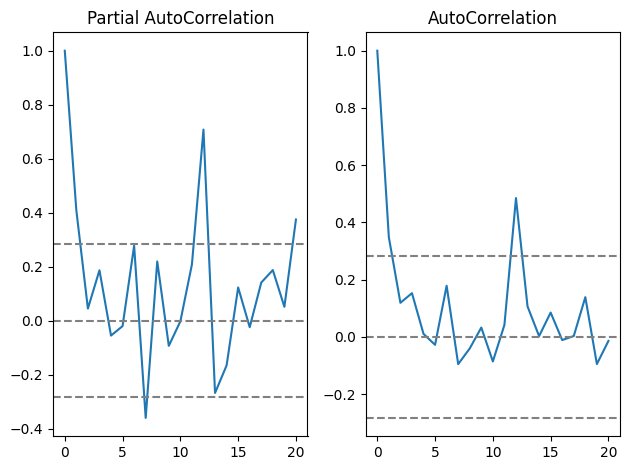

In [331]:
plot(exp3)

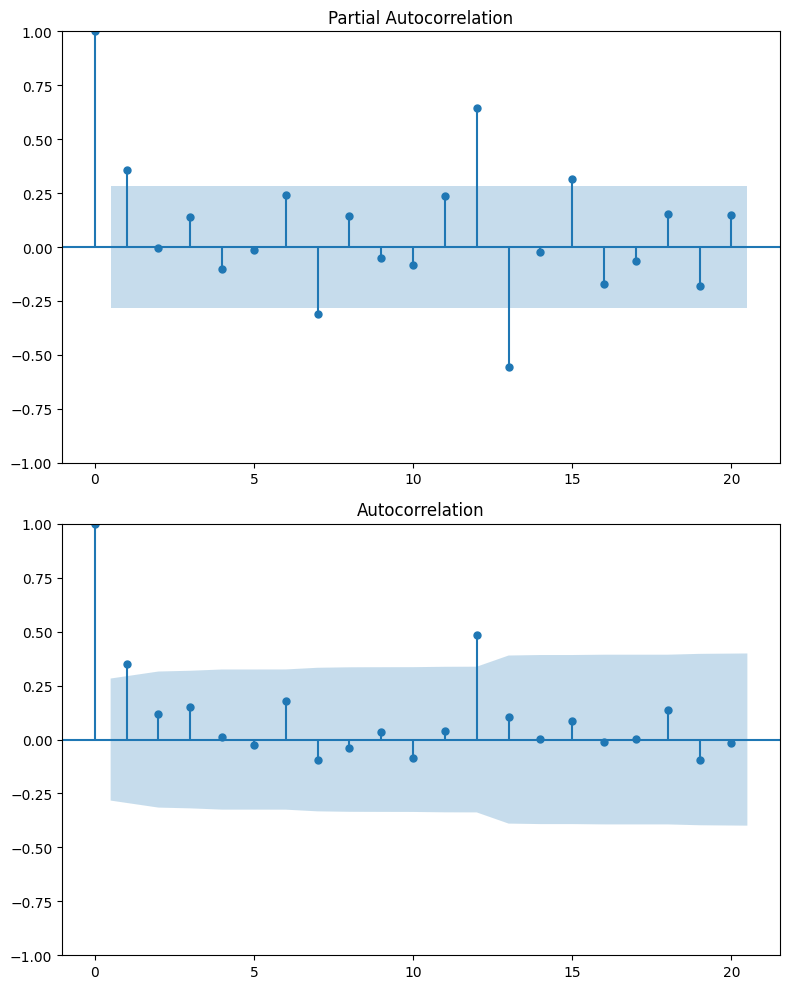

In [332]:
corelogram_plot(exp3)

In [333]:
arma_trail(exp3,1,6,1,3)

p =  1 and d =  0 and q =  1
1019.8579842236494
p =  1 and d =  0 and q =  2
1021.5613927239364
p =  2 and d =  0 and q =  1
1021.4745430741388
p =  2 and d =  0 and q =  2
1023.4290323344796
p =  3 and d =  0 and q =  1
1022.6964956783097
p =  3 and d =  0 and q =  2
1017.0702571918509
p =  4 and d =  0 and q =  1
1024.6369532104138
p =  4 and d =  0 and q =  2
1018.7588256139675
p =  5 and d =  0 and q =  1
1020.725236677129
p =  5 and d =  0 and q =  2
1021.2275546640731


In [334]:
arma(exp3,3,2)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -501.535
Date:                Tue, 31 Jan 2023   AIC                           1017.070
Time:                        23:28:39   BIC                           1030.169
Sample:                    01-31-2014   HQIC                          1022.020
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.801e+04   3406.510      5.286      0.000    1.13e+04    2.47e+04
ar.L1         -0.4678      0.224     -2.092      0.036      -0.906      -0.030
ar.L2         -0.4431      0.236     -1.881      0.0

In [335]:
arma(exp3,5,2)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(5, 0, 2)   Log Likelihood                -501.614
Date:                Tue, 31 Jan 2023   AIC                           1021.228
Time:                        23:28:51   BIC                           1038.068
Sample:                    01-31-2014   HQIC                          1027.592
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.801e+04   3894.081      4.624      0.000    1.04e+04    2.56e+04
ar.L1         -0.7762      0.580     -1.338      0.181      -1.913       0.361
ar.L2          0.1448      0.346      0.418      0.6

In [349]:
train = exp3.iloc[:38]
test = exp3.iloc[38:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 38, test = 10


In [350]:
m_a = ARIMA(exp3,order=(5,0,2))
r_a = m_a.fit()
    
pred_arma = r_a.predict(len(train),len(train)+len(test)-1)
print(pred_arma)
print('\n')
    
actual = []; pred = []
for i in range(len(pred_arma)):
    actual.append(test[i])
    pred.append(pred_arma[i])

df_arma = pd.DataFrame({'actual':actual, 'predicted':pred}, index=test.index)
df_arma['error'] = df_arma.actual - df_arma.predicted
    
model_arma = 'arma Model'
mse_arma = mean_squared_error(df_arma.actual, df_arma.predicted)
rmse_arma = np.sqrt(mse_arma)
print(model_arma)
print('MSE = ',mse_arma)
print('RMSE = ',rmse_arma)

Order Date
2017-03-31    23580.998931
2017-04-30     7927.220444
2017-05-31    23897.871185
2017-06-30    20057.790553
2017-07-31    13470.032985
2017-08-31    16783.306624
2017-09-30    16539.486734
2017-10-31    24331.839928
2017-11-30    25447.545541
2017-12-31    28416.303719
Freq: M, Name: predicted_mean, dtype: float64


arma Model
MSE =  83139682.6350564
RMSE =  9118.096437034235


In [351]:
fc_arma = r_a.get_forecast(24)

fc = fc_arma.predicted_mean
fc

2018-01-31    33252.966770
2018-02-28    22507.258616
2018-03-31    26240.126630
2018-04-30    18586.780164
2018-05-31    18345.745692
2018-06-30    18542.950994
2018-07-31    18534.129005
2018-08-31    16405.716562
2018-09-30    19456.699222
2018-10-31    16857.307013
2018-11-30    18598.377292
2018-12-31    17455.700083
2019-01-31    18710.236665
2019-02-28    17097.633844
2019-03-31    18955.940221
2019-04-30    17156.264113
2019-05-31    18744.037288
2019-06-30    17321.590566
2019-07-31    18713.778330
2019-08-31    17267.666837
2019-09-30    18754.468629
2019-10-31    17287.358478
2019-11-30    18692.387345
2019-12-31    17346.930718
Freq: M, Name: predicted_mean, dtype: float64

In [352]:
d = exp3.append(fc)
d

2014-01-31     6729.032286
2014-02-28     3136.798886
2014-03-31    16607.530293
2014-04-30    13366.639205
2014-05-31    17572.418375
                  ...     
2019-08-31    17267.666837
2019-09-30    18754.468629
2019-10-31    17287.358478
2019-11-30    18692.387345
2019-12-31    17346.930718
Freq: M, Length: 72, dtype: float64

In [347]:
arma_fc = d[47:]
arma_fc

2017-12-31    43819.468717
2018-01-31    11521.912348
2018-02-28    10778.328497
2018-03-31    14194.883485
2018-04-30    13130.587341
2018-05-31    17338.159441
2018-06-30    18096.917794
2018-07-31    14568.564740
2018-08-31    16164.046759
2018-09-30    25552.177564
2018-10-31    19446.419597
2018-11-30    30284.324128
2018-12-31    27805.027857
2019-01-31    13223.487148
2019-02-28    12737.968159
2019-03-31    15327.050731
2019-04-30    14506.778593
2019-05-31    17666.133354
2019-06-30    18210.520508
2019-07-31    15550.255867
2019-08-31    16723.589887
2019-09-30    23777.516177
2019-10-31    19159.014534
2019-11-30    27303.393513
2019-12-31    25412.389606
2020-01-31    14439.504990
2020-02-29    14048.095521
2020-03-31    15988.960582
2020-04-30    15345.910507
2020-05-31    17715.781147
2020-06-30    18099.178728
2020-07-31    16092.363201
2020-08-31    16948.895147
2020-09-30    22248.015036
2020-10-31    18748.757241
2020-11-30    24868.095982
2020-12-31    23420.242835
F

In [353]:
pred = r_a.predict()

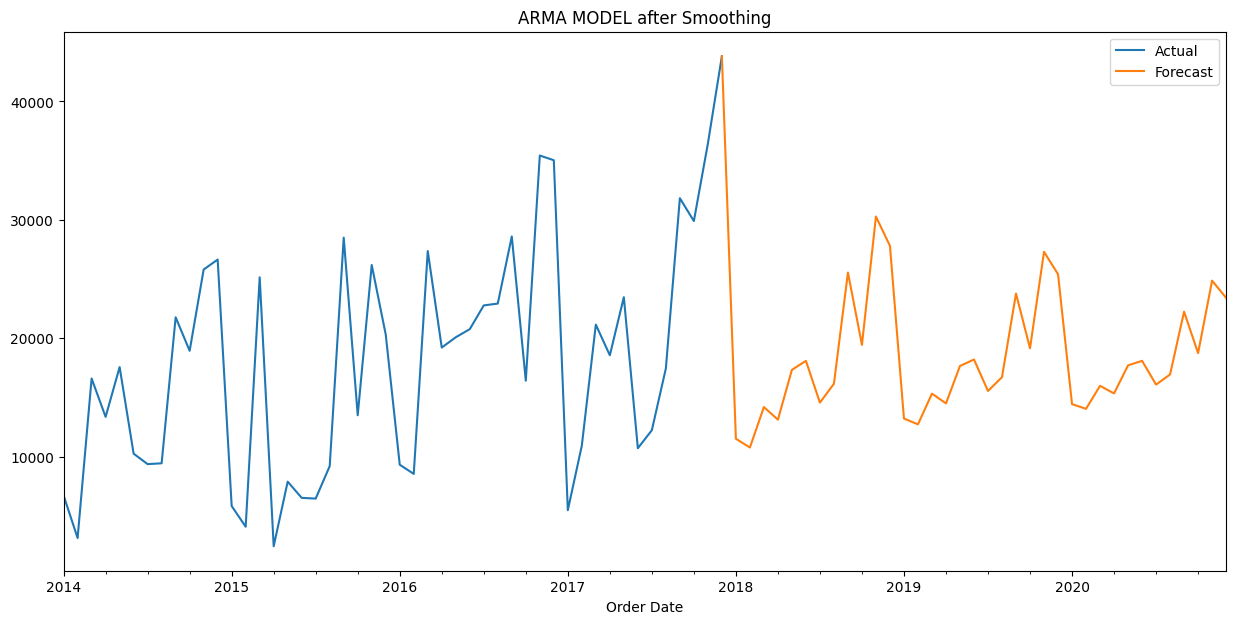

In [358]:
exp3.plot(figsize=(15,7),label='Actual')
arma_fc.plot(label='Forecast');
plt.legend()
plt.title('ARMA MODEL after Smoothing')
plt.show()

### For Technology Data with Smoothing is good model.

In [384]:
final_df = pd.DataFrame({'Category':df.Category.unique(),'Types of Model':['ARIMA,SARIMA', 'ARMA, ARMA with Exp Smoothing', 'ARMA, ARMA with Exp Smoothing'], 'Best Model':['SARIMA','ARMA','ARMA with Exp Smoothing'], 'MSE':[60765717.32,53289799.54,83139682.63], 'RMSE':[7795.23,7299.98,9118.09]})
final_df

,Category,Types of Model,Best Model,MSE,RMSE
0,Office Supplies,"ARIMA,SARIMA",SARIMA,60765717.32,7795.23
1,Furniture,"ARMA, ARMA with Exp Smoothing",ARMA,53289799.54,7299.98
2,Technology,"ARMA, ARMA with Exp Smoothing",ARMA with Exp Smoothing,83139682.63,9118.09
